# Find the Nearest Hospitals

This projects aims at locating hospitals in densely populated cities such as New York, Tokyo, and Paris and compare it with it's population and analysig the city for pandemic situation

In [75]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# print('Folium installed')
# print('Libraries imported.')

**Setting up the API**

In [76]:
CLIENT_ID = '2IW1RLL2EC22MEO0NCI0LCSWT2H4R2SX5UZJZBLL2V3O3AFJ' # your Foursquare ID
CLIENT_SECRET = '0G23CDVM3O5K3PTMWODT15JX2QG14ZJOB5ZLCS5DOBWNGK2B' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2IW1RLL2EC22MEO0NCI0LCSWT2H4R2SX5UZJZBLL2V3O3AFJ
CLIENT_SECRET:0G23CDVM3O5K3PTMWODT15JX2QG14ZJOB5ZLCS5DOBWNGK2B


## Data importing 

### New York

__Locating New York__

In [77]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
ny_latitude = location.latitude
ny_longitude = location.longitude
print(ny_latitude, ny_longitude)

40.7127281 -74.0060152


__Searching Hospitals__

In [78]:
search_query = 'Hospital'
radius = 40000

print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ny_latitude, ny_longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

Hospital .... OK!


__Converting into Data Frame__

In [79]:
# assign relevant part of JSON to hospitals
hospitals = results['response']['venues']

# tranform hospitals into a dataframe
df_ny = json_normalize(hospitals)
df_ny.shape

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


(30, 19)

### Tokyo

__Locating Tokyo__

In [80]:
address = 'Tokyo, Japan'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
tk_latitude = location.latitude
tk_longitude = location.longitude
print(tk_latitude, tk_longitude)

35.6828387 139.7594549


__Searching Hospitals__

In [81]:
search_query = 'Hospital'
LIMIT = 100
radius = 40000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, tk_latitude, tk_longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

Hospital .... OK!


__Converting into Data Frame__

In [82]:
# assign relevant part of JSON to hospitals
hospitals = results['response']['venues']

# tranform hospitals into a dataframe
df_tk = json_normalize(hospitals)
df_tk.head()

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood
0,4b7e3469f964a520ffe52fe3,Toranomon Hospital (虎の門病院),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383426,False,虎ノ門2-2-2,35.668780,139.746678,"[{'label': 'display', 'lat': 35.66878028496117...",1945,105-0001,JP,港区,東京都,日本,"[虎ノ門2-2-2, 港区, 東京都, 105-0001, 日本]",NaN,NaN
1,4b8dc254f964a520620c33e3,St. Luke's Hospital (聖路加国際病院),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383426,False,明石町9-1,35.667372,139.777500,"[{'label': 'display', 'lat': 35.66737156875987...",2372,104-8560,JP,東京,東京都,日本,"[明石町9-1, 中央区, 東京都, 104-8560, 日本]",NaN,NaN
2,4b5b90c8f964a5208b0729e3,Keio University Hospital (慶應義塾大学病院),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383426,False,信濃町35,35.681880,139.717972,"[{'label': 'display', 'lat': 35.68188, 'lng': ...",3752,160-8582,JP,新宿区,東京都,日本,"[信濃町35, 新宿区, 東京都, 160-8582, 日本]",NaN,NaN
3,5eab8ffd67572b0007589382,Yokohama Municipal Citizen’s Hospital (横浜市立市民病院),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383426,False,神奈川区三ツ沢西町1-1,35.468858,139.604816,"[{'label': 'display', 'lat': 35.46885777775581...",27630,221-0855,JP,横浜市,神奈川県,日本,"[神奈川区三ツ沢西町1-1, 横浜市, 神奈川県, 221-0855, 日本]",NaN,NaN
4,5b61109d088158002c9d1ab4,International University of Health and Werfare...,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383426,False,国府台6-1-14,35.756844,139.902540,"[{'label': 'display', 'lat': 35.756844, 'lng':...",15332,272-0827,JP,市川市,千葉県,日本,"[国府台6-1-14, 市川市, 千葉県, 272-0827, 日本]",NaN,NaN


### Paris

__Locating Paris__

In [83]:
address = 'Paris, France'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
pr_latitude = location.latitude
pr_longitude = location.longitude
print(pr_latitude, pr_longitude)

48.8566969 2.3514616


__Searching Hospitals__

In [84]:
search_query = 'Hospital'
LIMIT = 100
radius = 40000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, pr_latitude, pr_longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

Hospital .... OK!


__Converting into Data Frame__

In [85]:
# assign relevant part of JSON to hospitals
hospitals = results['response']['venues']

# tranform hospitals into a dataframe
df_pr = json_normalize(hospitals)
df_pr.head()

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.city,location.state,venuePage.id,location.crossStreet
0,50dd6f67e4b0add0e71f37bd,Hospital Nnecker,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383428,False,48.870183,2.351002,"[{'label': 'display', 'lat': 48.87018291494488...",1501,FR,France,[France],NaN,NaN,NaN,NaN,NaN,NaN
1,50f8db68e4b070089ca027d2,American Hospital of Paris,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383428,False,48.870697,2.331678,"[{'label': 'display', 'lat': 48.87069730004591...",2127,FR,France,"[44, rue d'Amsterdam, 75008 Paris, France]","44, rue d'Amsterdam",75008,Paris,Île-de-France,NaN,NaN
2,4b695e65f964a52028a02be3,Hôpital de la Pitié-Salpêtrière,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383428,False,48.837549,2.364292,"[{'label': 'display', 'lat': 48.83754878953055...",2329,FR,France,"[47 boulevard de l'Hôpital, 75013 Paris, France]",47 boulevard de l'Hôpital,75013,Paris,Île-de-France,NaN,NaN
3,4f507bd3e4b07c3381f1575a,American Hospital Paris,"[{'id': '4bf58dd8d48988d1b3941735', 'name': 'M...",v-1590383428,False,48.872050,2.309073,"[{'label': 'display', 'lat': 48.87205004493644...",3543,FR,France,"[France, France]",France,NaN,NaN,NaN,NaN,NaN
4,4d0b312f109d6dcb14a18d8d,Hospital Paul D Egine,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1590383428,False,48.811221,2.516621,"[{'label': 'display', 'lat': 48.81122090610476...",13118,FR,France,"[4-22 Avenue Marx Dormoy, 94500 Champigny-sur-...",4-22 Avenue Marx Dormoy,94500,Champigny-sur-Marne,Île-de-France,NaN,NaN


## Cleaning Dataset

### New York

__Creating the Dataset useable__
<br>
Here we will remove all unwanted data from the dataframe.

In [86]:
df_ny = df_ny[['name','location.lat','location.lng','location.distance']]
df_ny.rename(columns={"name": "Name", "location.lat": "Lat", "location.lng": "Long", "location.distance" : "Dist"}, inplace = True)
df_ny.head()

,Name,Lat,Long,Dist
0,NewYork-Presbyterian-Lower Manhattan Hospital,40.709917,-74.004758,330
1,NY Presbyterian Hospital Lower Manhattan Hosp ER,40.709985,-74.004720,324
2,Bellevue Hospital Center,40.739475,-73.975453,3938
3,Battery Park Veterinary Hospital,40.708163,-74.017927,1126
4,Tribeca Soho Animal Hospital,40.720578,-74.004869,879


### Tokyo

__Creating the Dataset useable__
<br>
Here we will remove all unwanted data from the dataframe.

In [87]:
df_tk = df_tk[['name','location.lat','location.lng','location.distance']]
df_tk.rename(columns={"name": "Name", "location.lat": "Lat", "location.lng": "Long", "location.distance" : "Dist"}, inplace = True)
df_tk.head()

,Name,Lat,Long,Dist
0,Toranomon Hospital (虎の門病院),35.668780,139.746678,1945
1,St. Luke's Hospital (聖路加国際病院),35.667372,139.777500,2372
2,Keio University Hospital (慶應義塾大学病院),35.681880,139.717972,3752
3,Yokohama Municipal Citizen’s Hospital (横浜市立市民病院),35.468858,139.604816,27630
4,International University of Health and Werfare...,35.756844,139.902540,15332


### Paris

__Creating the Dataset useable__
<br>
Here we will remove all unwanted data from the dataframe.

In [88]:
df_pr = df_pr[['name','location.lat','location.lng','location.distance']]
df_pr.rename(columns={"name": "Name", "location.lat": "Lat", "location.lng": "Long", "location.distance" : "Dist"}, inplace = True)
df_pr.head()

,Name,Lat,Long,Dist
0,Hospital Nnecker,48.870183,2.351002,1501
1,American Hospital of Paris,48.870697,2.331678,2127
2,Hôpital de la Pitié-Salpêtrière,48.837549,2.364292,2329
3,American Hospital Paris,48.872050,2.309073,3543
4,Hospital Paul D Egine,48.811221,2.516621,13118


## Plotting

### New York

__Plotting it on Map__

In [89]:
ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)

# add the hospitals as blue circle markers
for lat, lng, label in zip(df_ny.Lat, df_ny.Long, df_ny.Name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ny_map)

# display map
ny_map

### Tokyo

__Plotting it on Map__

In [90]:
tk_map = folium.Map(location=[tk_latitude, tk_longitude], zoom_start=12)

# add the hospitals as blue circle markers
for lat, lng, label in zip(df_tk.Lat, df_tk.Long, df_tk.Name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(tk_map)

# display map
tk_map

__Plotting it on Map__

In [91]:
from IPython.display import display
pr_map = folium.Map(location=[pr_latitude, pr_longitude], zoom_start=12)

# add the hospitals as blue circle markers
for lat, lng, label in zip(df_pr.Lat, df_pr.Long, df_pr.Name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(pr_map)

# display map
pr_map

## Clustering

__Using KMeans__

### New York

In [92]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_ny[['Dist']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.01, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_ny["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_ny[["Name", "Lat", "Long", "Dist", "Clus_Db"]].head(5)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Name,Lat,Long,Dist,Clus_Db
0,NewYork-Presbyterian-Lower Manhattan Hospital,40.709917,-74.004758,330,0
1,NY Presbyterian Hospital Lower Manhattan Hosp ER,40.709985,-74.004720,324,0
2,Bellevue Hospital Center,40.739475,-73.975453,3938,-1
3,Battery Park Veterinary Hospital,40.708163,-74.017927,1126,-1
4,Tribeca Soho Animal Hospital,40.720578,-74.004869,879,-1


### Tokyo

In [93]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_tk[['Dist']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.01, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_tk["Clus_Db"]=labels + 1

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_tk[["Name", "Lat", "Long", "Dist", "Clus_Db"]].head(5)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Name,Lat,Long,Dist,Clus_Db
0,Toranomon Hospital (虎の門病院),35.668780,139.746678,1945,1
1,St. Luke's Hospital (聖路加国際病院),35.667372,139.777500,2372,2
2,Keio University Hospital (慶應義塾大学病院),35.681880,139.717972,3752,3
3,Yokohama Municipal Citizen’s Hospital (横浜市立市民病院),35.468858,139.604816,27630,0
4,International University of Health and Werfare...,35.756844,139.902540,15332,0


### Paris

In [94]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_pr[['Dist']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.01, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_pr["Clus_Db"]=labels + 1

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_pr[["Name", "Lat", "Long", "Dist", "Clus_Db"]].head(5)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Name,Lat,Long,Dist,Clus_Db
0,Hospital Nnecker,48.870183,2.351002,1501,0
1,American Hospital of Paris,48.870697,2.331678,2127,0
2,Hôpital de la Pitié-Salpêtrière,48.837549,2.364292,2329,1
3,American Hospital Paris,48.872050,2.309073,3543,2
4,Hospital Paul D Egine,48.811221,2.516621,13118,0


## Plotting Clusters

### New York

In [95]:
colors = ['red','blue','green','brown']

ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)

#Visualisation
for lat, lng, clus in zip(df_ny.Lat, df_ny.Long, df_ny.Clus_Db):
    if clus > 3:
        clus = 3
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color = colors[clus],
        popup = label,
        fill = True,
        fill_color=colors[clus],
        fill_opacity=0.6
    ).add_to(ny_map)
ny_map

### Tokyo

In [96]:
colors = ['red','blue','green','brown',]

tk_map = folium.Map(location=[tk_latitude, tk_longitude], zoom_start=11)

#Visualisation
for lat, lng, clus in zip(df_tk.Lat, df_tk.Long, df_tk.Clus_Db):
    if clus > 3:
        clus = 3
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color = colors[clus],
        popup = label,
        fill = True,
        fill_color=colors[clus],
        fill_opacity=0.6
    ).add_to(tk_map)
tk_map

### Paris

In [97]:
colors = ['red','blue','green','brown']

pr_map = folium.Map(location=[pr_latitude, pr_longitude], zoom_start=11)

#Visualisation
for lat, lng, clus in zip(df_pr.Lat, df_pr.Long, df_pr.Clus_Db):
    if clus > 3:
        clus = 3
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color = colors[clus],
        popup = label,
        fill = True,
        fill_color=colors[clus],
        fill_opacity=0.6
    ).add_to(pr_map)
pr_map

## Comaparision

In [98]:

Population_ny = 8400000
Population_tk = 9270000
Population_pr = 2150000
Hospitals_ny = df_ny.shape[0]
Hospitals_tk = df_tk.shape[0]
Hospitals_pr = df_pr.shape[0]

__Population__

<BarContainer object of 3 artists>

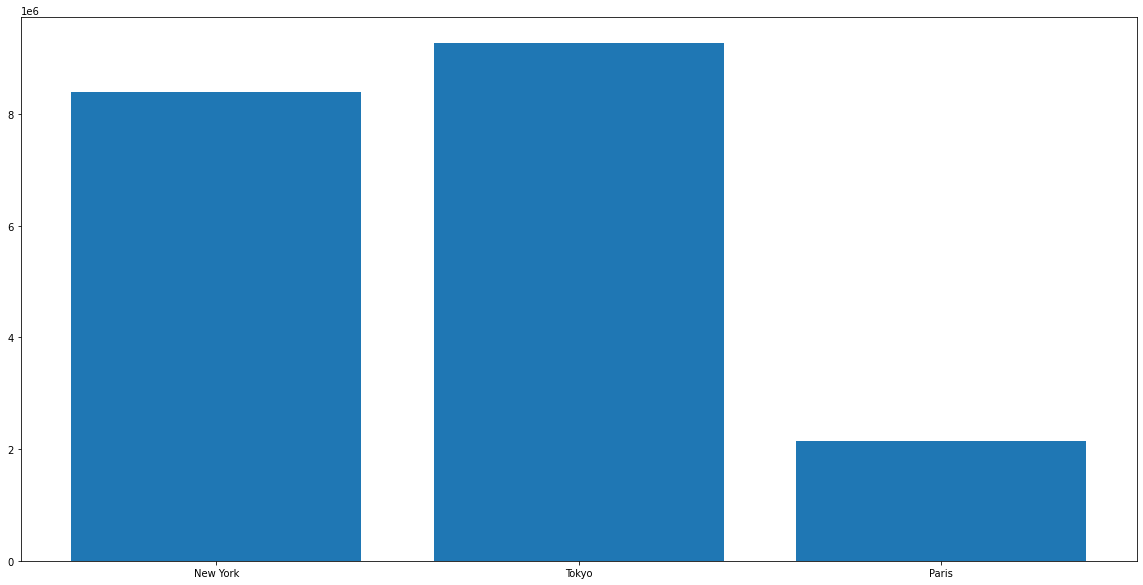

In [103]:
X = ['New York', 'Tokyo', 'Paris']
Y = [Population_ny, Population_tk, Population_pr]
plt.figure(figsize=(20,10))
plt.bar(X,Y)